In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import sys
import os
import numpy as np
import urllib
import cv2
os.getcwd()

'/Users/tspri/Documents/MemeCC/Meme-CC/server'

In [4]:
from app.db import queries

In [5]:
social = queries.SocialMedia()
memes = social.getAll()

In [9]:
len((list(memes)))

2853

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
image_count = len(list(memes.url.glob('*/*.jpg')))

AttributeError: 'Query' object has no attribute 'url'

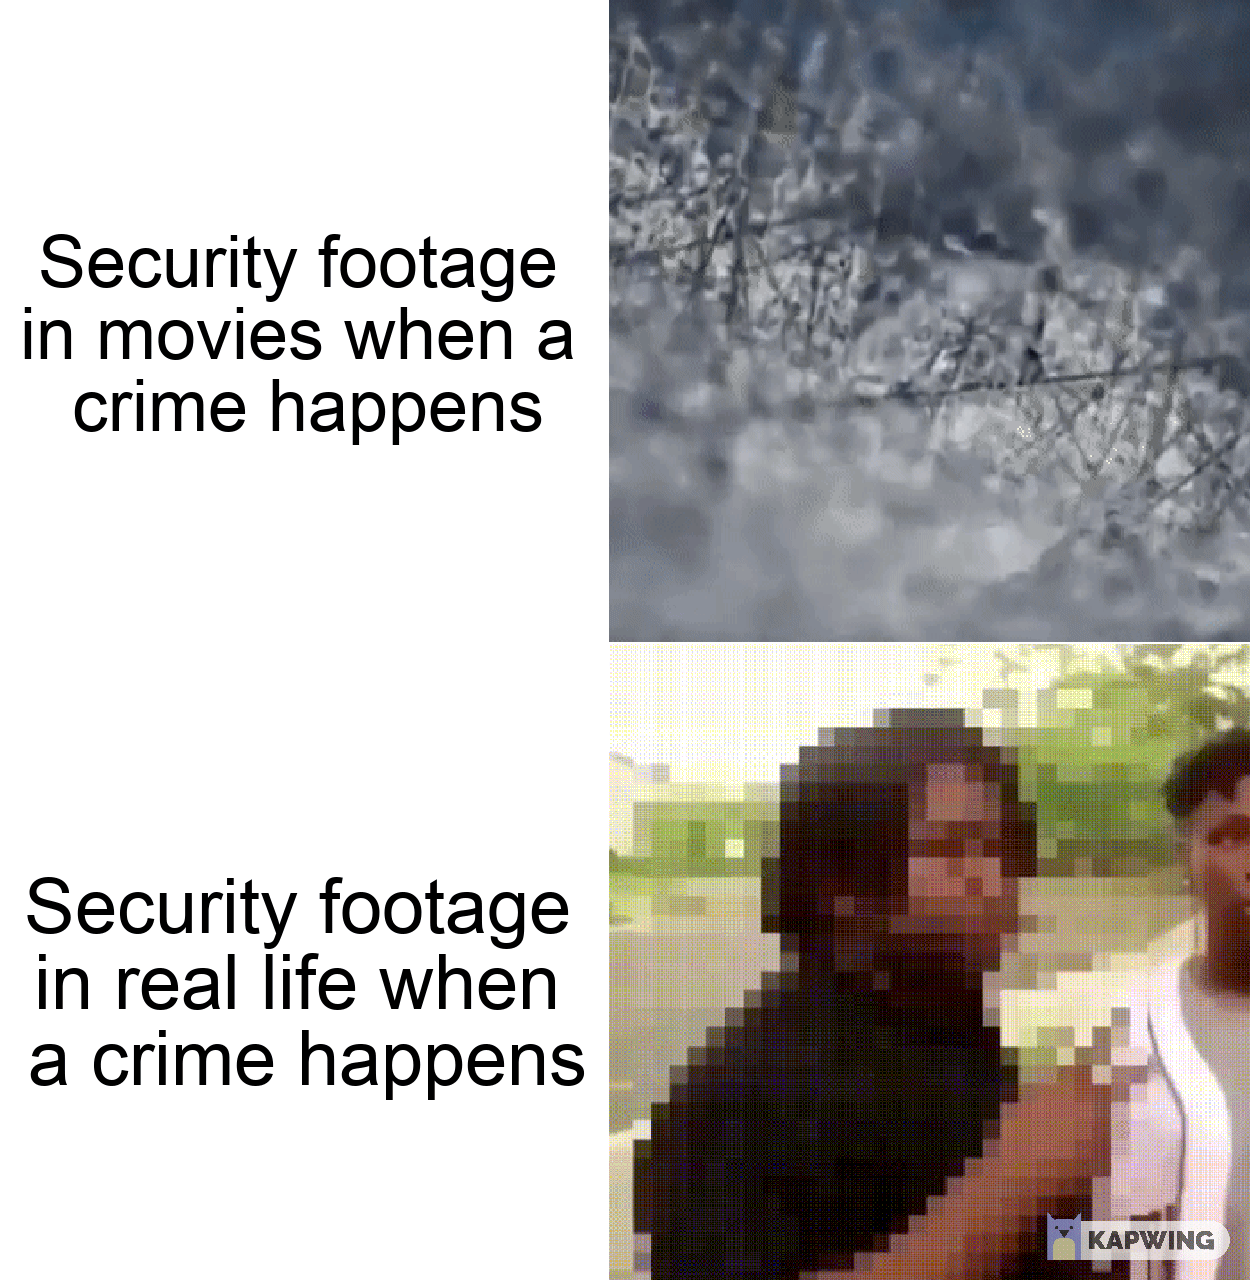

In [210]:
import requests

PIL.Image.open(requests.get(memes[8].url, stream=True).raw)

In [37]:
batch_size = 32
img_height = 180
img_width = 180
image_dir = list(map(lambda m : requests.get(m.url, stream=True).raw, memes))

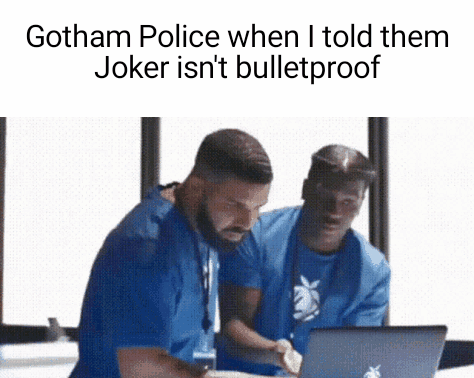

In [29]:
PIL.Image.open(image_dir[2])


In [12]:
df = pd.DataFrame(memes) 
df

,post_id,likes,url,shortlink,author,title,created_at,file_name,source,text
0,u1gpa0,150719,https://i.redd.it/o50e3tawlys81.gif,https://redd.it/u1gpa0,GoKaroZ,Still waiting,2022-04-11 20:27:40,GoKreu1gpa.png,Reddit,
1,tso3wn,141023,https://i.redd.it/zycuveqncmq81.gif,https://redd.it/tso3wn,akebomba,No wonder he became an actor,2022-03-31 01:06:14,akeretso3w.png,Reddit,
2,u477rj,135952,https://i.redd.it/o4l1hvfouot81.gif,https://redd.it/u477rj,thetruememeisbest,just shoot him,2022-04-15 12:43:12,thereu477r.png,Reddit,
3,u8ivtd,122415,https://i.redd.it/6p6ies9kguu81.gif,https://redd.it/u8ivtd,TheWTFGuyOfficial,That's how you raise kids...,2022-04-21 08:38:54,Thereu8ivt.png,Reddit,
4,u8v7wq,103060,https://i.redd.it/183ddft9mxu81.gif,https://redd.it/u8v7wq,PotatoBunny9519,I'm fine,2022-04-21 19:16:19,Potreu8v7w.png,Reddit,
...,...,...,...,...,...,...,...,...,...,...
2848,u9uyhy,58,https://i.redd.it/uft1tm6ut6v81.png,https://redd.it/u9uyhy,Dareyouni,"New Hit Light Novel and Anime: ""I Can't Believ...",2022-04-23 02:16:49,Darreu9uyh.png,Reddit,When an assassin has a target to finish off bu...
2849,u9avt0,59,https://i.redd.it/y7wu483cy1v81.jpg,https://redd.it/u9avt0,snuggeybug,Raising the Price and ShArInG pASsWoRdS,2022-04-22 09:50:56,snureu9avt.png,Reddit,Netflix Losing Si scribes
2850,u8jfx7,60,https://i.redd.it/1wklc3mrnuu81.gif,https://redd.it/u8jfx7,LtGoosemanTG,This is the sucks,2022-04-21 09:19:21,LtGreu8jfx.png,Reddit,
2851,u847v3,59,https://i.redd.it/yxp6s6g5iqu81.jpg,https://redd.it/u847v3,Bleachsmoker,I need to respec,2022-04-20 19:20:37,Blereu847v.png,Reddit,—) ls joking Sheen trig ans) Tin sitting beer ...


In [208]:
def image_processing(image_url):
    """Converts the URL of any image to an array of size 100x1 
    The array represents an OpenCV grayscale version of the original image
    The image will get cropped along the biggest red contour (4 line polygon) tagged on the original image (if any)
    """
    #Download from image url and import it as a numpy array
    #Using pillow to deal with GIFs too
    pil_image = PIL.Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
    open_cv_image = np.array(pil_image)
    image_bgr = open_cv_image[:,:,::-1].copy()
    #Convert to HSV for creating a mask
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    #Convert to grayscale that will actually be used for training, instead of color image 
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    #Create a mask that detects the red rectangular tags present in each image
    mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))
    #Get the coordinates of the red rectangle in the image, 
    #But take entire image if mask fails to detect the red rectangle
    if len(np.where(mask != 0)[0]) != 0:
        y1 = min(np.where(mask != 0)[0])
        y2 = max(np.where(mask != 0)[0])
    else:
        y1 = 0                                     
        y2 = len(mask)
    if len(np.where(mask != 0)[1]) != 0:
        x1 = min(np.where(mask != 0)[1])
        x2 = max(np.where(mask != 0)[1])
    else:
        x1 = 0
        x2 = len(mask[0])
    #Crop the grayscle image along those coordinates
    image_cropped = image_gray[y1:y2, x1:x2]
    if image_cropped.size ==0:
        print(image_url)
        return image_cropped
    else:
    #Resize the image to 100x100 pixels size
        image_100x100 = cv2.resize(image_cropped, (100, 100))
    #Save image as in form of array of 10000x1
        image_arr = image_100x100.flatten()
    return image_arr

In [48]:
memes[0].url

'https://i.redd.it/o50e3tawlys81.gif'

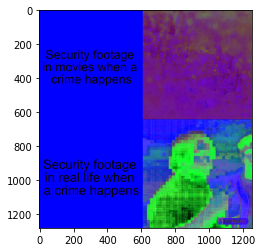

In [27]:
pil_image = PIL.Image.open(requests.get(memes[8].url, stream=True).raw).convert('RGB')
open_cv_image = np.array(pil_image)
image_bgr = open_cv_image[:,:,::-1].copy()
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image_hsv)

In [33]:
image_list = []
for count, url in enumerate(df['url'].tolist()[:]):
    image_list.append(image_processing(url))
    if count % 50 == 0:
        print(count)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
https://i.redd.it/pw1r8osbliv81.jpg
1250
1300
https://i.redd.it/wxxypvn98fu81.jpg
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850


(<matplotlib.image.AxesImage at 0x17c8d28e0>,)

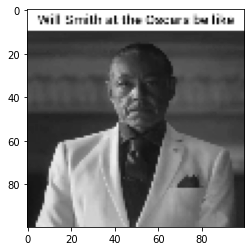

In [34]:
test = image_processing(memes[1].url)
plt.figure()
plt.imshow(test.reshape(100, 100), cmap='gray'), 

In [13]:
X = np.array(image_list,dtype=object)
np.save('processed_100x100_meme.npy',X/255,allow_pickle=True)

NameError: name 'image_list' is not defined

In [14]:
meme_array=np.load('processed_100x100_meme.npy',allow_pickle=True)

In [15]:
X=[]
exclude=[]
for i in range(len(meme_array)):
    if meme_array[i].shape == (10000,):
        X.append(meme_array[i])
    else:
        exclude.append(i)
X=np.array(X)
#also remove from the dataframe
df.drop(df.index[exclude],inplace=True)

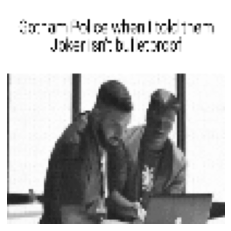

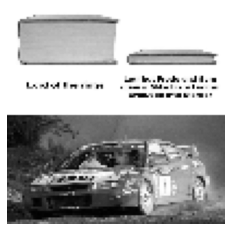

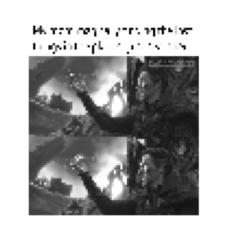

In [17]:
plt.imshow(meme_array[2].reshape(100, 100), cmap='gray'), plt.axis('off')
np.random.seed(42)
for i in np.random.randint(0, len(meme_array), 2):
    plt.figure()
    plt.imshow(meme_array[i].reshape(100, 100), cmap='gray'), plt.axis('off')


In [19]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)
#Define a Convolutional Neural Network Model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(n_classes, activation='softmax'))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 batch_normalization_3 (Batc  (None, 98, 98, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 16)        2320      
                                                                 
 batch_normalization_4 (Batc  (None, 96, 96, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                      

In [183]:
from sklearn.model_selection import train_test_split #For splitting of data

save_at = "model_meme_regression_3.hdf5"
save_best2 = ModelCheckpoint (save_at, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')

# x and y
Y = np.array(df.likes.tolist())
#randomize X and Y 
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

In [184]:
X_test = X[2500:,]
Y_test = Y[2500:,]
X_train, X_val, Y_train, Y_val = train_test_split(X[:2600,], Y[:2600,], test_size=0.15, random_state=42)

In [185]:
X_train.shape

(2210, 10000)

In [186]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [187]:
X_train.shape

(2210, 100, 100, 1)

In [188]:
history = model.fit( X_train, Y_train, 
                    epochs = 15, batch_size = 32, 
                    callbacks=[save_best2], verbose=1, 
                   validation_data = (X_val, Y_val))


Epoch 1/15


2022-04-27 11:35:59.627658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 268332464.0000

2022-04-27 11:36:11.578492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 15s 93ms/step - loss: 268332464.0000 - val_loss: 185858912.0000
Epoch 2/15
70/70 [==============================] - 4s 51ms/step - loss: 260566096.0000 - val_loss: 192338416.0000
Epoch 3/15
70/70 [==============================] - 3s 48ms/step - loss: 257823840.0000 - val_loss: 187236112.0000
Epoch 4/15
70/70 [==============================] - 4s 55ms/step - loss: 260146512.0000 - val_loss: 185255536.0000
Epoch 5/15
70/70 [==============================] - 3s 50ms/step - loss: 256396880.0000 - val_loss: 188971984.0000
Epoch 6/15
70/70 [==============================] - 4s 51ms/step - loss: 256202640.0000 - val_loss: 186177904.0000
Epoch 7/15
70/70 [==============================] - 4s 53ms/step - loss: 254477680.0000 - val_loss: 193984544.0000
Epoch 8/15
70/70 [==============================] - 3s 49ms/step - loss: 254196032.0000 - val_loss: 188614544.0000
Epoch 9/15
70/70 [==============================] - 3s 48ms/step - loss: 249914576.0000 - 

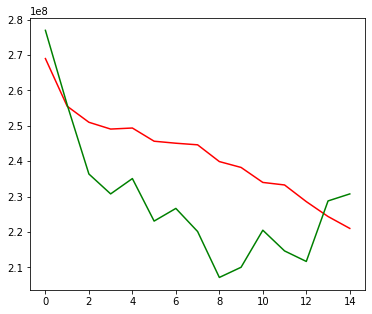

In [26]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history.history['loss'], color='r')
#validation loss
plt.plot(history.history['val_loss'], color='g')
plt.show()


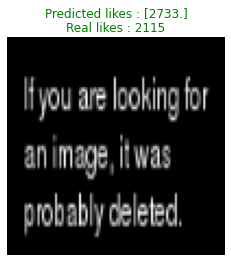

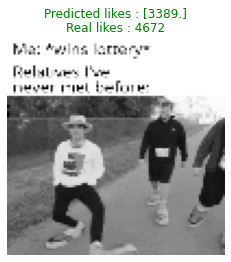

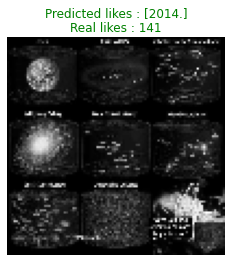

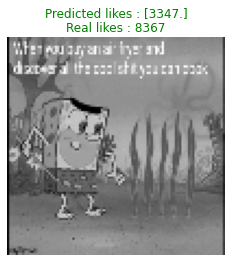

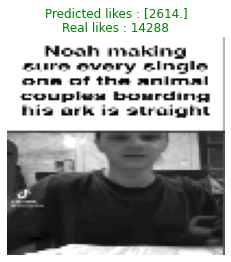

In [32]:
Y_pred = np.round(model.predict(X_test))
np.random.seed(15)
for rand_num in np.random.randint(0, len(Y_test), 5):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100),cmap='gray'), plt.axis('off')
    plt.title('Predicted likes : ' +str(Y_pred[rand_num]) + '\nReal likes : ' +str(Y_test[rand_num]), color='g')


In [204]:
import itertools
from tensorflow.keras.models import load_model
originalmodel = load_model('model_meme_regression.hdf5')
model = load_model('model_meme_regression_2.hdf5')

# Parsing humor based on Reddit likes
# Dividing into three statistical categories but along a scale of 0 to 100
def parsehumor(likes):
    print(likes+1)  

def accuracy(preds, vals):
    sum = 0
    for (pred, val) in zip(preds, vals):
        if abs(pred-val) < 10000*(min(1, 100000/val)):
            sum += 1
    return sum/(len(preds))

Y_pred = model.predict(X_test)
Y_oldpred = originalmodel.predict(X_test)  
accuracy(Y_pred, Y_test)

2022-04-27 12:20:13.805444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-27 12:20:14.640103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.8233618233618234

In [189]:
len(X_test)

351

In [200]:
def parsehumor(likes): 
    str_likes = str(likes)
    if isinstance(likes, np.ndarray):
        str_likes = str(int(likes[0]))                    
    if (int(str_likes) < 10000):
        return "1".ljust(5, "0")
    if int(str_likes[1]) > 5:
        begin = str((int(str_likes[0])+1))
    else:
        begin = str_likes[0]
    return begin.ljust((len(str_likes)), "0")
Y_humortest = (list(map(parsehumor, Y_test)))
Y_humorpred = (list(map(parsehumor, Y_pred)))

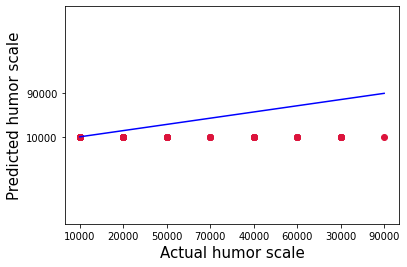

In [202]:
plt.figure()
plt.scatter(Y_humortest, Y_humorpred, c='crimson')
p1 = max(max(Y_humorpred), max(Y_humortest))
p2 = min(min(Y_humorpred), min(Y_humortest))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual humor scale', fontsize=15)
plt.ylabel('Predicted humor scale', fontsize=15)
plt.axis('equal')
plt.show()

In [207]:
from tensorflow.keras.models import load_model
model = load_model('model_meme_regression_2.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(f"Loss: {score}")
print(f"Original model accuracy: {accuracy(Y_oldpred, Y_test)}\nNew model accuracy: {accuracy(Y_pred, Y_test)}")


2022-04-27 12:20:40.566247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss: 214501568.0
Original model accuracy: 0.6267806267806267
New model accuracy: 0.8233618233618234
